# Projeto 2 - Parte II -  Classificação

Esse notebook tem como objetivo explorar os algoritmos de aprendizado supervisionado para a classificação em cima do dataset Pen-Based Recognition of Handwritten Digits Data Set. 


O andamento dessa parte do projeto vai seguir de acordo com as seguintes seções:
* [Load dataset](#title1)
* [Data split](#title2)
* [Pre-processing](#title3)
* [Vizualization](#title4)
* [Training Logistic Regression Multiclass](#title5)
* [Training OneVsOne Classifier](#title6)
* [Evaluation Logistic Regression Multiclass](#title7)
* [Evaluation OneVsOne Classifier](#title8)
* [Test Logistic Regression Multiclass](#title9)
* [Test OneVsOne Classifier](#title10)

### Load Dataset <a name="title1" />

Primeiramente vamos importar as bibliotecas importantes para essa parte do trabalho

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import load_digits

Em seguida, iremos carregar o nosso dataset e viualizar algumas informações básicas sobre ele

In [2]:
digits = load_digits()
data = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                     columns= digits['feature_names'] + ['target'])

In [3]:
print("Shape", data.shape)

Shape (1797, 65)


In [4]:
data.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [5]:
print("First line")
data.iloc[0]

First line


pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
target        0.0
Name: 0, Length: 65, dtype: float64

Uma informação muito importante é entendermos a distibuição de classes no dataset que como podemos ver abaixo é bem próxima para todas elas

<AxesSubplot:>

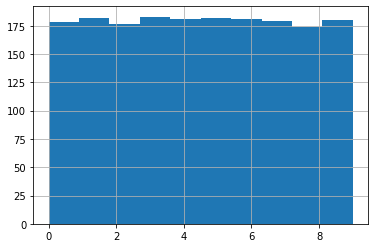

In [6]:
data['target'].hist()

### Data Split <a name="title2" />

In [7]:
train, test = train_test_split(data, test_size=0.1,  random_state=11)
print("Train shape", train.shape)
print("Test shape", test.shape)

Train shape (1617, 65)
Test shape (180, 65)


<AxesSubplot:>

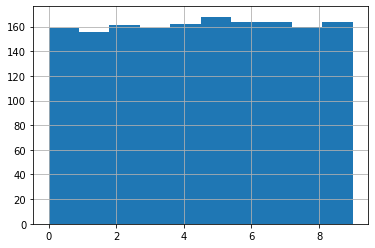

In [8]:
train['target'].hist()

<AxesSubplot:>

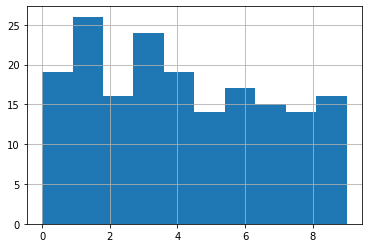

In [9]:
test['target'].hist()

In [10]:
x_train = train.loc[:, train.columns != 'target']
y_train = train['target']
x_test = test.loc[:, test.columns != 'target']
y_test = test['target']
print("Train dimensiom:", x_train.shape, y_train.shape)
print("Test dimensiom:", x_test.shape, y_test.shape)

Train dimensiom: (1617, 64) (1617,)
Test dimensiom: (180, 64) (180,)


In [11]:
kf = KFold(n_splits=4, shuffle=True, random_state= 11)
print(kf)
kf.get_n_splits(train)

KFold(n_splits=4, random_state=11, shuffle=True)


4

### Pre-processing <a name="title3" />

In [12]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train, norm = "l2")
print(x_train.max(), x_train.min())
x_test = normalize(x_test, norm = "l2")
print(x_test.max(), x_test.min())

0.32031106631923656 0.0
0.30866412046611236 0.0


### Vizualization <a name="title4" />

In [13]:
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2, random_state=11).fit_transform(x_train)
train_embedded.shape

(1617, 2)

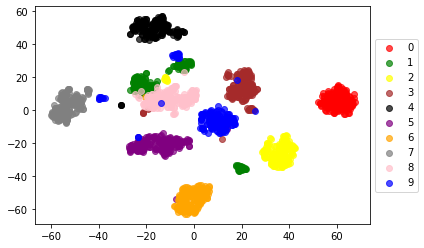

In [14]:
import matplotlib.pyplot as plt
colors = ["red", "green", "yellow", "brown", "black", "purple", "orange", "gray", "pink", "blue"]
color_by_target = []
fig, ax = plt.subplots()
for i in range(10):
    color_i = []
    for j in range(1617):
        if list(y_train)[j] == i:
            color_i.append(train_embedded[j])
    color_by_target.append(color_i)
for i in range(10):
    for j in range(len(color_by_target[i])):
        if j == 0:
            ax.scatter(color_by_target[i][j][0] , color_by_target[i][j][1] , color = colors[i], alpha=0.7, label=str(i))
        else:
            ax.scatter(color_by_target[i][j][0] , color_by_target[i][j][1] , color = colors[i], alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Training Logistic Regression Multiclass <a name="title5" />

In [17]:
import warnings
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

penalty = ['l2', 'none', 'l1']
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
c = [0.01, 0.1, 1, 10, 100]
max_iter = [1, 10, 100, 1000, 10000]
models = []
acurr_total = []
f1score_total = []
index = 0
max_score = 0
max_index = 0
for p in penalty:
    print(p)
    for s in solvers:
        if (s == 'lbfgs' and  p != 'l2' and p != 'none') or (s == 'newton-cg' and  p != 'l2' and p != 'none') or (s == 'sag' and  p != 'l2' and p != 'none'):
            continue
        else:
            for value in c:
                for it in max_iter:

                    hyperparmeter = [p, s, value, it]
                    f1score = []
                    acurr = []
                    for train_set, val_set in kf.split(train):
                        clf_lr = LogisticRegression(multi_class='multinomial',
                                penalty=p, #lasso regression
                                solver=s,
                                max_iter=it,
                                C=value).fit(x_train[train_set], y_train.iloc[train_set])

                        y_pred = clf_lr.predict(x_train[val_set])
                        f1score.append(f1_score(y_train.iloc[val_set], y_pred, average='macro'))
                        acurr.append(accuracy_score(y_train.iloc[val_set], y_pred))

                    models.append(clf_lr)
                    f1score_total.append(sum(f1score)/4)
                    acurr_total.append(sum(acurr)/4)

                    
                    
                    if acurr_total[-1] > max_score:
                        max_index = index
                        max_score = acurr_total[-1]

                    print(f'Index {index}- Hyp: {hyperparmeter} Accur: {acurr_total[-1]}  f1 score: {f1score_total[-1]}')
                    index += 1
print("===========================")
print("MAX",max_index, max_score)




l2
Index 0- Hyp: ['l2', 'lbfgs', 0.01, 1] Accur: 0.4862043148759321  f1 score: 0.44993882311850114
Index 1- Hyp: ['l2', 'lbfgs', 0.01, 10] Accur: 0.6494025791468035  f1 score: 0.6147184373394357
Index 2- Hyp: ['l2', 'lbfgs', 0.01, 100] Accur: 0.6494025791468035  f1 score: 0.6147184373394357
Index 3- Hyp: ['l2', 'lbfgs', 0.01, 1000] Accur: 0.6494025791468035  f1 score: 0.6147184373394357
Index 4- Hyp: ['l2', 'lbfgs', 0.01, 10000] Accur: 0.6494025791468035  f1 score: 0.6147184373394357
Index 5- Hyp: ['l2', 'lbfgs', 0.1, 1] Accur: 0.4862043148759321  f1 score: 0.44993882311850114
Index 6- Hyp: ['l2', 'lbfgs', 0.1, 10] Accur: 0.8961068329055127  f1 score: 0.8932557827267369
Index 7- Hyp: ['l2', 'lbfgs', 0.1, 100] Accur: 0.897344456667889  f1 score: 0.8944735561874939
Index 8- Hyp: ['l2', 'lbfgs', 0.1, 1000] Accur: 0.897344456667889  f1 score: 0.8944735561874939
Index 9- Hyp: ['l2', 'lbfgs', 0.1, 10000] Accur: 0.897344456667889  f1 score: 0.8944735561874939
Index 10- Hyp: ['l2', 'lbfgs', 1,

### Training OneVsOne Classifier <a name="title6" />

In [20]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
import warnings
from sklearn.metrics import accuracy_score, f1_score
warnings.filterwarnings('ignore')

penalty2 = ['l2']
loss2 = ['hinge', 'squared_hinge']
c2 = [0.1, 1, 10, 100]
max_iter2 = [100, 1000, 10000]
models2 = []
acurr_total2 = []
f1score_total2 = []
index = 0
max_score2 = 0
max_index2 = 0
for l in loss2:
    for p in penalty2:
        print(l, p)
        if l =='hinge' and p == 'l1':
            continue
        else:
            for value in c2:
                for it in max_iter2:

                    hyperparmeter = [l, p, value, it]
                    f1score = []
                    acurr = []
                    for train_set, val_set in kf.split(train):
                        clf_oo =  OneVsOneClassifier(LinearSVC(random_state=0,
                                loss =l,
                                penalty=p,
                                max_iter=it,
                                C=value)).fit(x_train[train_set], y_train.iloc[train_set])

                        y_pred = clf_oo.predict(x_train[val_set])
                        acurr.append(accuracy_score(y_train.iloc[val_set], y_pred))
                        f1score.append(f1_score(y_train.iloc[val_set], y_pred, average='macro'))

                    models2.append(clf_oo)
                    f1score_total2.append(sum(f1score)/4)
                    acurr_total2.append(sum(acurr)/4)


                    if acurr_total2[-1] > max_score2:
                        max_index2 = index
                        max_score2 = acurr_total2[-1]

                    print(f'Index {index}- Hyp: {hyperparmeter} Acc: {acurr_total2[-1]} f1 score: {f1score_total2[-1]}')
                    index += 1
print("===========================")
print("MAX",max_index2, max_score2)

hinge l2
Index 0- Hyp: ['hinge', 'l2', 0.1, 100] Acc: 0.9152716660554945 f1 score: 0.9150781042439456
Index 1- Hyp: ['hinge', 'l2', 0.1, 1000] Acc: 0.9152716660554945 f1 score: 0.9150781042439456
Index 2- Hyp: ['hinge', 'l2', 0.1, 10000] Acc: 0.9152716660554945 f1 score: 0.9150781042439456
Index 3- Hyp: ['hinge', 'l2', 1, 100] Acc: 0.9697011367803446 f1 score: 0.9695729223296832
Index 4- Hyp: ['hinge', 'l2', 1, 1000] Acc: 0.9690823248991566 f1 score: 0.968915371656768
Index 5- Hyp: ['hinge', 'l2', 1, 10000] Acc: 0.9690823248991566 f1 score: 0.968915371656768
Index 6- Hyp: ['hinge', 'l2', 10, 100] Acc: 0.9820682068206821 f1 score: 0.982020826791313
Index 7- Hyp: ['hinge', 'l2', 10, 1000] Acc: 0.9814509228700647 f1 score: 0.9813758890334289
Index 8- Hyp: ['hinge', 'l2', 10, 10000] Acc: 0.9814509228700647 f1 score: 0.9813758890334289
Index 9- Hyp: ['hinge', 'l2', 100, 100] Acc: 0.9795929592959296 f1 score: 0.9794883842213072
Index 10- Hyp: ['hinge', 'l2', 100, 1000] Acc: 0.978977203275883

### Test Logistic Regression <a name="title9" />

The best model using Accuracy was LogisticRegression(C=100, max_iter=10, multi_class='multinomial',
                   solver='newton-cg')
Test perofrmance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.96      0.98        26
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        24
         4.0       1.00      1.00      1.00        19
         5.0       0.93      1.00      0.97        14
         6.0       1.00      0.94      0.97        17
         7.0       0.93      0.93      0.93        15
         8.0       0.87      0.93      0.90        14
         9.0       0.94      0.94      0.94        16

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



<AxesSubplot:>

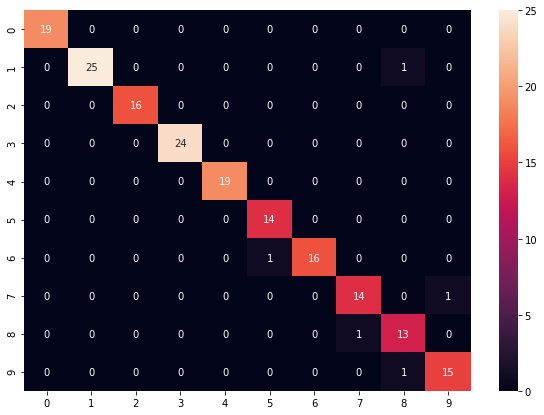

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

print(f"The best model using Accuracy was {models[46]}")

y_pred = models[46].predict(x_test)

print(f"Test perofrmance") 
print(f"{classification_report(y_test, y_pred)}")

cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True)

### Test OneVsOne Classifier <a name="title10" />

The best model using Accuracy was OneVsOneClassifier(estimator=LinearSVC(C=10, loss='hinge', max_iter=100,
                                       random_state=0))
Test perofrmance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        16
         3.0       1.00      0.96      0.98        24
         4.0       1.00      1.00      1.00        19
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        17
         7.0       0.93      0.93      0.93        15
         8.0       0.93      1.00      0.97        14
         9.0       0.94      0.94      0.94        16

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



<AxesSubplot:>

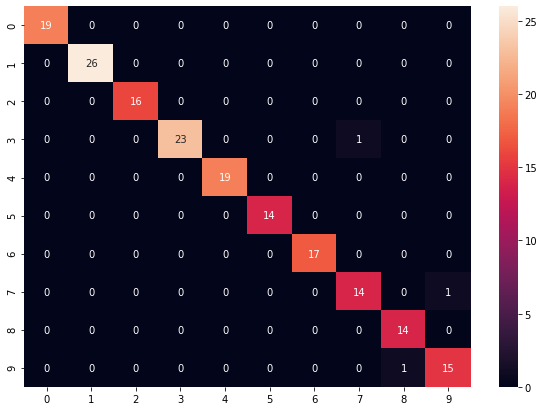

In [21]:
print(f"The best model using Accuracy was {models2[6]}")

y_pred = models2[6].predict(x_test)

print(f"Test perofrmance") 
print(f"{classification_report(y_test, y_pred)}")

cm_oo = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_oo, annot=True)